# Neural Network

Deep learning, a subfield of machine learning that is a set of algorithms that is inspired by the structure and function of the brain. These algorithms are usually called Artificial Neural Networks (ANN). Deep learning is one of the hottest fields in data science with many case studies that have astonishing results in robotics, image recognition and Artificial Intelligence (AI).

- Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. 
- The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.
- In the process of learning, a neural network finds the right function, or the correct manner of transforming x into y. 
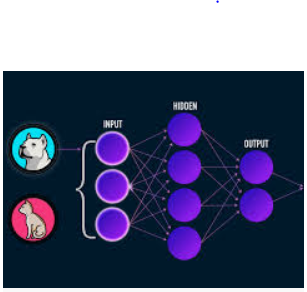

- As seen from above diagram we conisider three layers in neural network :**INPUT , HIDDEN & OUTPUT**

## Features
- Cluster and classify. 
- Group unlabeled data according to similarities among the example inputs, and they classify data when they have a labeled dataset to train on.
- Feature Extraction
- Develope Algorithms for reinforcement learning, classification and regression (Deep Neural Networks)

### General way to solve problems with Neural Networks
Neural networks is a special type of machine learning (ML) algorithm. So, like every ML algorithm, it follows the usual ML workflow of data preprocessing, model building and model evaluation. For the sake of conciseness, I have listed out a To-D0 list of how to approach a Neural Network problem.

- Check if it is a problem where Neural Network gives you uplift over traditional algorithm
- Do a survey of which Neural Network architecture is most suitable for the required problem
- Define Neural Network architecture through whichever language / library you choose.
- Convert data to right format and divide it in batches
- Pre-process the data according to your needs
- Augment Data to increase size and make better trained models
- Feed batches to Neural Network
- Train and monitor changes in training and validation data sets
- Test your model, and save it for future use

## About Libaries 

- **Keras** is a powerful easy-to-use Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries **Theano and TensorFlow** and allows you to define and train neural network models in a few short lines of code.



## Implementation 

Lets First Initialize with a simple random generated data.

### Problem 
- We have a data that  describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

- As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.

###  WHY RANDOM SEED?

- This means they make use of randomness, such as initializing to random weights, and in turn the same network trained on the same data can produce different results.

- The random initialization allows the network to learn a good approximation for the function being learned.

- Randomness is used Neural Network performs better with it than without.


In [5]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
#fix random seed for reproducibility
np.random.seed(7)

In [7]:
d=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv")

d.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


## Define Model
Models in Keras are defined as a sequence of layers.

- We create a Sequential model and add layers one at a time until we are happy with our network topology.

- The first thing to get right is to ensure the input layer has the right number of inputs. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

- We can piece it all together by adding each layer. The first layer has 12 neurons and expects 8 input variables. The second hidden layer has 8 neurons and finally, the output layer has 1 neuron to predict the class (onset of diabetes or not).

## Compile Model
Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to make predictions for this problem.

We must specify the loss function to use to evaluate a set of weights, the optimizer used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use logarithmic loss, which for a binary classification problem is defined in Keras as “binary_crossentropy“. We will also use the efficient gradient descent algorithm “adam” for no other reason that it is an efficient default.

## Fit Model
We have defined our model and compiled it ready for efficient computation.Now it is time to execute the model on some data.We can train or fit our model on our loaded data by calling the fit() function on the model.

- The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the nepochs argument. 
- We can also set the number of instances that are evaluated before a weight update in the network is performed, called the batch size and set using the batch_size argument.

- For this problem, we will run for a small number of iterations (150) and use a relatively small batch size of 10. Again, these can be chosen experimentally by trial and error.

## Evaluate Model
We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

- This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

- Evaluate your model on your training dataset using the evaluate() function on your model and pass it the same input and output used to train the model.

## Finally Make Predictions

- epochs :  give the number of times the model is trained over the entire dataset

In [24]:

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load pima indians dataset
dataset = np.loadtxt("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


Epoch 1/150
 - 0s - loss: 0.6773 - acc: 0.6510
Epoch 2/150
 - 0s - loss: 0.6584 - acc: 0.6510
Epoch 3/150
 - 0s - loss: 0.6467 - acc: 0.6510
Epoch 4/150
 - 0s - loss: 0.6389 - acc: 0.6510
Epoch 5/150
 - 0s - loss: 0.6325 - acc: 0.6510
Epoch 6/150
 - 0s - loss: 0.6188 - acc: 0.6510
Epoch 7/150
 - 0s - loss: 0.6186 - acc: 0.6510
Epoch 8/150
 - 0s - loss: 0.6134 - acc: 0.6510
Epoch 9/150
 - 0s - loss: 0.6083 - acc: 0.6510
Epoch 10/150
 - 0s - loss: 0.6149 - acc: 0.6510
Epoch 11/150
 - 0s - loss: 0.6051 - acc: 0.6510
Epoch 12/150
 - 0s - loss: 0.6038 - acc: 0.6510
Epoch 13/150
 - 0s - loss: 0.6004 - acc: 0.6510
Epoch 14/150
 - 0s - loss: 0.6033 - acc: 0.6510
Epoch 15/150
 - 0s - loss: 0.5992 - acc: 0.6510
Epoch 16/150
 - 0s - loss: 0.5988 - acc: 0.6510
Epoch 17/150
 - 0s - loss: 0.5979 - acc: 0.6510
Epoch 18/150
 - 0s - loss: 0.6031 - acc: 0.6510
Epoch 19/150
 - 0s - loss: 0.5972 - acc: 0.6510
Epoch 20/150
 - 0s - loss: 0.5979 - acc: 0.6510
Epoch 21/150
 - 0s - loss: 0.5948 - acc: 0.6510
E

## EXAMPLE 2 
- We are using  a network with 1 input, 10 neurons in the hidden layer, and 1 output. The network will use a mean squared error loss function and will be trained using the efficient ADAM algorithm.

- The network needs about 1,000 epochs to solve this problem effectively, but we will only train it for 100 epochs. This is to ensure we get a model that makes errors when making predictions.

- After the network is trained, we will make predictions on the dataset and print the mean squared error

In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility
#from numpy.random import seed
#seed(1)

Using TensorFlow backend.


In [6]:
# create sequence
length = 10
sequence = [i/float(length) for i in range(length)]
# create X/y pairs
df = pd.DataFrame(sequence)
df = pd.concat([df.shift(1), df], axis=1)
df.dropna(inplace=True)
# convert to MLPfriendly format
values = df.values
X, y = values[:,0], values[:,1]

In [11]:
# fit MLP to dataset and print error
def fit_model(X, y):
	# design network
	model = Sequential()
	model.add(Dense(10, input_dim=1))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	model.fit(X, y, epochs=100, batch_size=len(X), verbose=0)
	# forecast
	yhat = model.predict(X, verbose=0)
	print(mean_squared_error(y, yhat[:,0]))
 
# repeat experiment
repeats = 10
for _ in range(repeats):
	fit_model(X, y)

0.1515518448436962
0.0037723240081637905
0.0055053199995830394
0.04998553417015786
0.2219504934124317
0.02248514390364262
0.11758562182893417
0.031132008190624956
0.1904165192533181
0.016771260792335478




### Seed the Random Number Generator
- Use a fixed seed for the random number generator.

- Random numbers are generated using a pseudo-random number generator. A random number generator is a mathematical function that will generate a long sequence of numbers that are random enough for general purpose use, such as in machine learning algorithms.

- The specific way to set the random number generator differs depending on the backend

### Seed Random Numbers with the Theano Backend
- Generally, Keras gets its source of randomness from the NumPy random number generator.

- For the most part, so does the Theano backend.

- We can seed the NumPy random number generator by calling the seed() function from the random module


In [40]:
from numpy.random import seed
seed(1)

#### Note: The importing and calling of the seed function is best done at the top of your code file.

This is a best practice because it is possible that some randomness is used when various Keras or Theano (or other) libraries are imported as part of their initialization, even before they are directly used.